Machine Learning - Semester Project 
------------------------------------------------------------

Done by Wania Naeem (22I-2369) and Emaan Ali (22I-2325)

This is the first part of the project - DATA PRE-PROCESSING!!!

- We are downloading the Fashion MNIST dataset using tensorflow/ keras
- Normalized the data into [0, 1]
- Split the dataset into 70:15:15 (Train set, Validation set, Test set)
- Flatten the images into 1D for non-NN Models

In [2]:
# Downloading the dataset
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Combine both
x_full = np.concatenate([x_train, x_test], axis=0)
y_full = np.concatenate([y_train, y_test], axis=0)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 19s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 8s 2us/step


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

# Setting the Random factor constant
np.random.seed(42)

# Normalizing the Fashion MNIST Dataset into pixel values [0, 1]
x_full = x_full.astype('float32') / 255.0

# Splitting the dataset into 70% Train set, 15% Validation set, 15% Test set
x_temp, x_test, y_temp, y_test = train_test_split(x_full, y_full, test_size=0.15, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.1765, random_state=42)  # 0.1765 of 85% ≈ 15%

In [4]:
# Flattening the Images into 1D now for non-NN models
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_val_flat = x_val.reshape(x_val.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

Dimension Reduction with PCA
-----------------------------------------------------
This is the second part - DIMENSION REDUCTION USING PCA!!

Dimension Reduction is a method of reducing features in our dataset while keeping the information the same. PCA (Principal Component Analysis) gives the most variance of the data in a feature. This is used to reduce training time, avoid overfitting and reduce noise in the dataset.

- Apply PCA to Training data only
- Choose components explaining >= 95% Variance
    - Checking which features retain more than or equal to 95% of their information
- Transform validation/test data using PCA
- PCA (95% AND 98% Variance), t-SNE (visualization), UMAP (50 components)

In [5]:
# Apply PCA to training set
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_flat)

PCA()

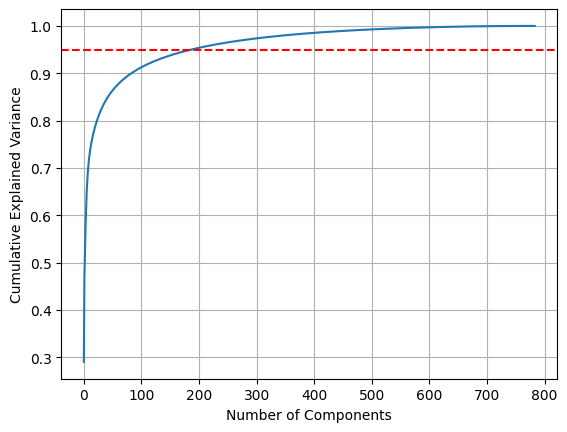

In [ ]:
# Plotting a cumalative explained variance of features vs number of components
# This gives us how many components are needed to retain 0.95 of the information
import matplotlib.pyplot as plt

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()


In [7]:
# Selecting the components required to retain 0.95 information
pca_95 = PCA(n_components=0.95)
x_train_pca95 = pca_95.fit_transform(x_train_flat)
x_val_pca95 = pca_95.transform(x_val_flat)
x_test_pca95 = pca_95.transform(x_test_flat)

In [8]:
# Selecting the components required to retain 0.98 information
pca_98 = PCA(n_components=0.98)
x_train_pca98 = pca_98.fit_transform(x_train_flat)
x_val_pca98 = pca_98.transform(x_val_flat)
x_test_pca98 = pca_98.transform(x_test_flat)

In [ ]:
# t-SNE for visualization of high dimension data in 2D or 3D
# Since this can be incredibly slow, We will use only 1000 images
# This is for pca 0.95
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
x_train_tsne95 = tsne.fit_transform(x_train_pca95[:1000])

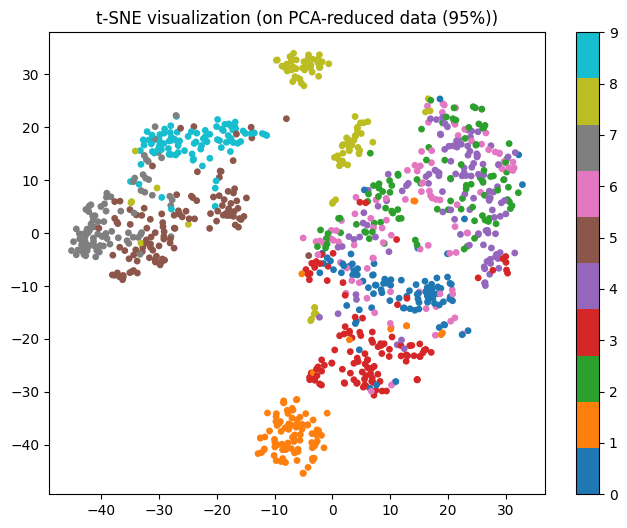

In [ ]:
# Plotting the t-SNE for 0.95
# The graph shows the closness (similarity) of the classes in the data.

plt.figure(figsize=(8,6))
plt.scatter(x_train_tsne95[:, 0], x_train_tsne95[:, 1], c=y_train[:1000], cmap='tab10', s=15)
plt.title("t-SNE visualization (on PCA-reduced data (95%))")
plt.colorbar()
plt.show()

In [12]:
# t-SNE for visualization of high dimension data in 2D or 3D
# Since this can be incredibly slow, We will use only 1000 images
# This is for pca 0.98

tsne2 = TSNE(n_components=2, random_state=42)
x_train_tsne98 = tsne2.fit_transform(x_train_pca98[:1000])

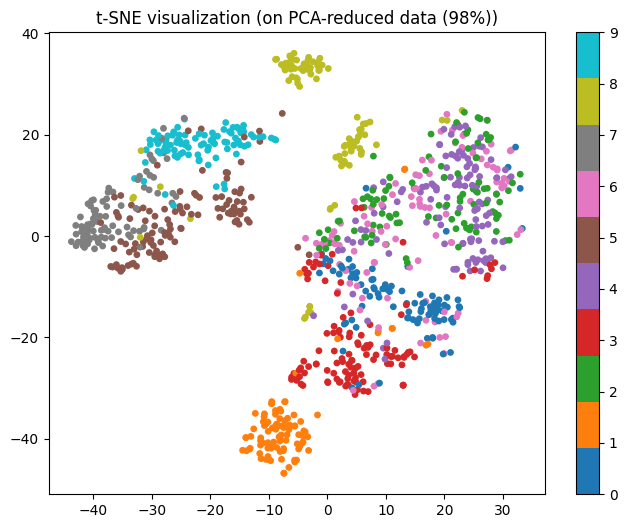

In [13]:
# Plotting the t-SNE for 0.98
# The graph shows the closness (similarity) of the classes in the data.

plt.figure(figsize=(8,6))
plt.scatter(x_train_tsne98[:, 0], x_train_tsne98[:, 1], c=y_train[:1000], cmap='tab10', s=15)
plt.title("t-SNE visualization (on PCA-reduced data (98%))")
plt.colorbar()
plt.show()

In [15]:
# Applying UMAP on PCA data (0.95)
import umap.umap_ as umap

reducer = umap.UMAP(n_components=50, random_state=42)
x_train_umap95 = reducer.fit_transform(x_train_pca95)
x_val_umap95 = reducer.transform(x_val_pca95)
x_test_umap95 = reducer.transform(x_test_pca95)

c:\Users\wania\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


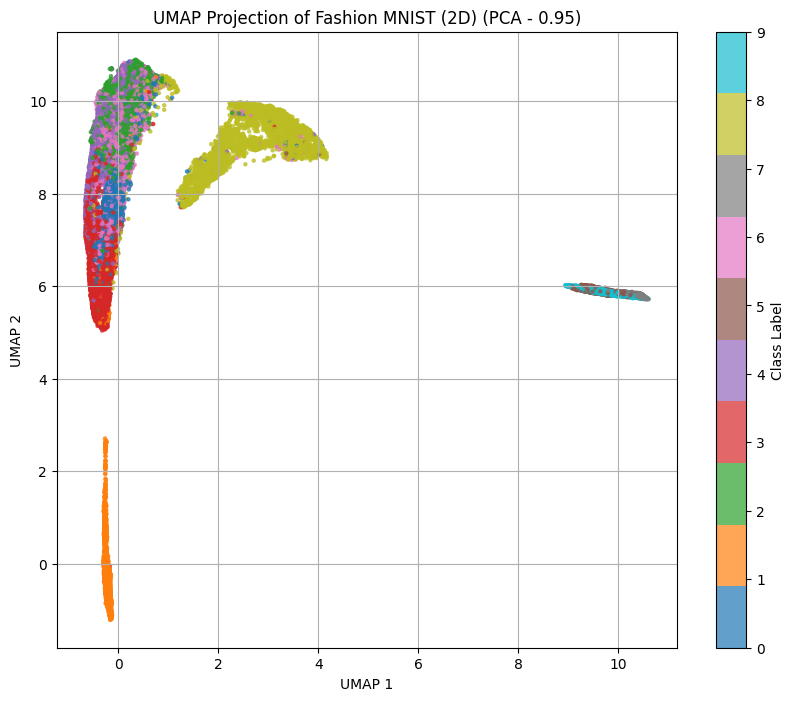

In [16]:
# Lets Visualize the UMAP propcessing on PCA 0.95 dataset
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x_train_umap95[:, 0], x_train_umap95[:, 1], 
    c=y_train, cmap='tab10', s=5, alpha=0.7
)
plt.colorbar(scatter, label="Class Label")
plt.title("UMAP Projection of Fashion MNIST (2D) (PCA - 0.95)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.show()

In [17]:
# Applying UMAP on PCA data (0.98)
import umap.umap_ as umap

reducer2 = umap.UMAP(n_components=50, random_state=42)
x_train_umap98 = reducer2.fit_transform(x_train_pca98)
x_val_umap98 = reducer2.transform(x_val_pca98)
x_test_umap98 = reducer2.transform(x_test_pca98)

c:\Users\wania\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


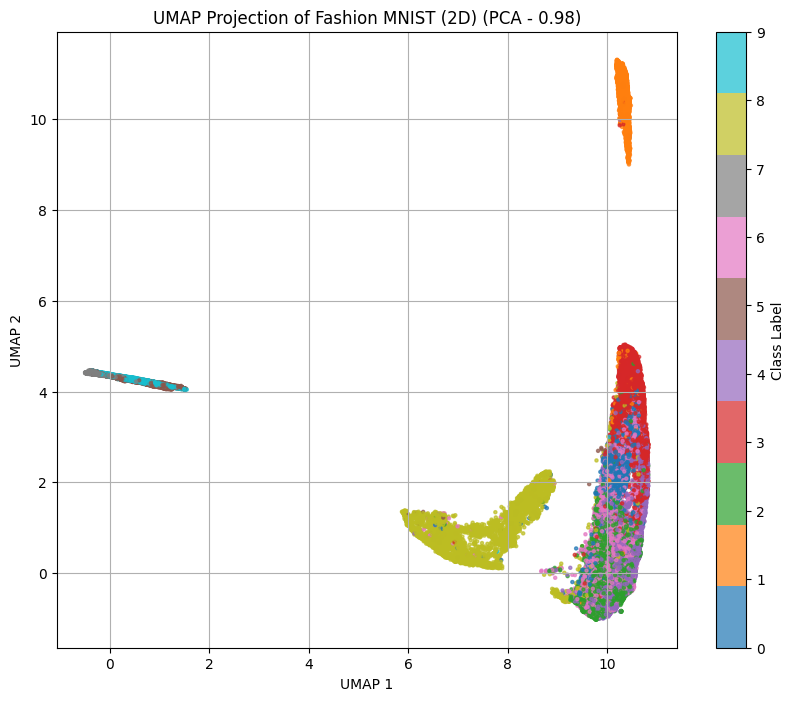

In [18]:
# Lets Visualize the UMAP propcessing on PCA 0.98 dataset
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x_train_umap98[:, 0], x_train_umap98[:, 1], 
    c=y_train, cmap='tab10', s=5, alpha=0.7
)
plt.colorbar(scatter, label="Class Label")
plt.title("UMAP Projection of Fashion MNIST (2D) (PCA - 0.98)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.show()